<a href="https://colab.research.google.com/github/carnival77/Machine_Learning/blob/master/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.Input Data**

In [180]:
!pip install tensorflow==1.4
!pip install colorama
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# from colorama import init, Fore
# init()

#(1)
m = 1000, a = 0.1, b = 0.4, σ = 0.03.

y=y^​+n -> y​=ax+b+n where n ~ N(0,0.03^2) 

1000개의 실수 [x,y] 데이터 생성
그 후 xi_arr, yi_arr 배열에 각각 저장.


In [0]:
num_points = 1000
vertors = []
for i in range(num_points):
  xi= np.random.normal(0.0,0.5) # random x value
  y_hat = xi*0.1 + 0.4 # y_hat = 0.1*xi + 0.4
  yi= y_hat + np.random.normal(0.0, 0.03) # y=y^​+n -> y^​=ax+b+n where n ~ N(0,0.03^2)
  vertors.append([xi,yi]) # 1000개의 [x,y] 데이터 생성.
xi_arr = [v[0] for v in vertors]
yi_arr = [v[1] for v in vertors]
  

#(2)
straight line of linear function y_hat = 0.1*xi + 0.4 
and data_set points

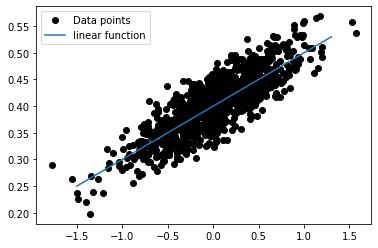

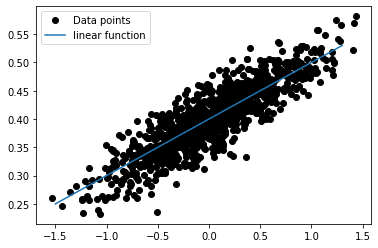

In [182]:
plt.plot(xi_arr,yi_arr,"ko",label = "Data points")
a_val = np.arange(-1.5,1.5,0.2)
y=[0.1*x +0.4 for x in a_val]
plt.plot(a_val,y,label="linear function")
plt.legend()
plt.show()

#**2. Output results**

W : theta_1 = -1 과 1 사이의 실수

b : theta_0

OF = objective function

In [0]:
W = tf.Variable(tf.random_uniform([1],-1.0,1.0))
b=tf.Variable(tf.zeros([1]))
y=xi_arr*W+b
OF = tf.reduce_mean(tf.square(y-yi_arr))

Minimize gap using Gradient Descent 

Set learning rate with 0.5

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(OF)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

15회 반복

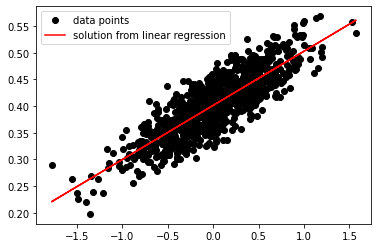

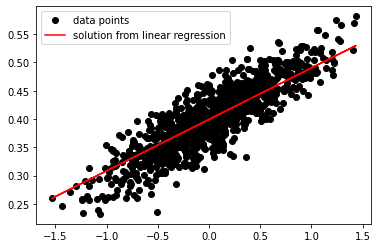

In [185]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
theta = []
OF_val=[]
for step in range(15):
  sess.run(train)
  theta.append([step,sess.run(W),sess.run(b)])
  OF_val.append([sess.run(OF,feed_dict={X: xi_arr, Y: yi_arr})])
plt.plot(xi_arr,yi_arr,'ko',label="data points")
plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),color="red",label="solution from linear regression")
plt.legend()
plt.show()

1의 초기 가정된 linear function 과 linear regression 을 통해 얻은 solution 비교

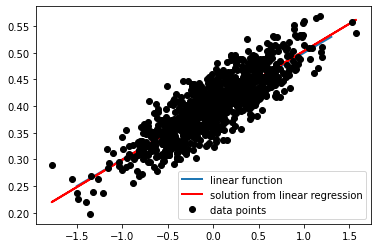

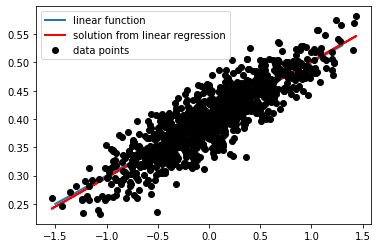

In [186]:
a_val = np.arange(-1.5,1.5,0.2)
y=[0.1*x +0.4 for x in a_val]
for step in range(15):
  sess.run(train)
  temp.append([step,(sess.run(W),sess.run(b))])
hypothesis = plt.plot(a_val,y,label="linear function")
solution = plt.plot(xi_arr,sess.run(W)*xi_arr + sess.run(b),color="red",label="solution from linear regression")
plt.plot(xi_arr,yi_arr,'ko',label="data points")
plt.setp(solution,linewidth=2.0)
plt.setp(hypothesis,linewidth=2.0)
plt.legend()
plt.show()

#**3.Plotting the energy values**

the value of the objective function at every optimization step by the gradient descent algorithm

In [187]:
for step in range(15):
  print(step, OF_val[step])

0 [0.0009634478]
1 [0.00093117857]
2 [0.00091190287]
3 [0.0009003888]
4 [0.0008935106]
5 [0.0008894021]
6 [0.0008869479]
7 [0.00088548195]
8 [0.0008846061]
9 [0.00088408316]
10 [0.0008837706]
11 [0.00088358397]
12 [0.0008834722]
13 [0.00088340585]
14 [0.00088336616]
0 [0.14525601]
1 [0.08071508]
2 [0.045025375]
3 [0.02528976]
4 [0.014376415]
5 [0.008341577]
6 [0.005004444]
7 [0.0031590853]
8 [0.0021386424]
9 [0.0015743606]
10 [0.0012623253]
11 [0.0010897769]
12 [0.0009943614]
13 [0.0009415985]
14 [0.00091242197]


#**4.Plotting the model parameters**